# Import all required packages

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [2]:
!wget "https://cdn.rri.co.id/berita/26/images/1678275755219-IMG_20230308_183755_618/1678275755219-IMG_20230308_183755_618.jpg"

--2024-08-05 11:13:52--  https://cdn.rri.co.id/berita/26/images/1678275755219-IMG_20230308_183755_618/1678275755219-IMG_20230308_183755_618.jpg
Resolving cdn.rri.co.id (cdn.rri.co.id)... 13.33.30.74, 13.33.30.13, 13.33.30.63, ...
Connecting to cdn.rri.co.id (cdn.rri.co.id)|13.33.30.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 624671 (610K) [image/jpeg]
Saving to: ‘1678275755219-IMG_20230308_183755_618.jpg’

1678275755219-IMG_2 100%[===================>] 610.03K  --.-KB/s    in 0.007s  

2024-08-05 11:13:52 (91.3 MB/s) - ‘1678275755219-IMG_20230308_183755_618.jpg’ saved [624671/624671]



In [1]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [5]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


# Import data


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_ROBOFLOW_API_KEY")
project = rf.workspace("kitera").project("kitera")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.73, to fix: `pip install ultralytics==8.0.196`


# Train The Model

In [4]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Kitera-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

# Export the model for further use

In [6]:
model = YOLO('/content/runs/detect/train6/weights/best.pt')

model.export(format='onnx')

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train6/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 74.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.4s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 8.8s, saved as '/content/runs/detect/train6/weights/best.onnx' (98.8 MB)

Export complete (14.8s)
Results saved to /content/runs/detect/train6/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train6/weights/best.onnx imgsz=640  
Validate:        yolo

'/content/runs/detect/train6/weights/best.onnx'

# Seeing the metrics used in YOLO


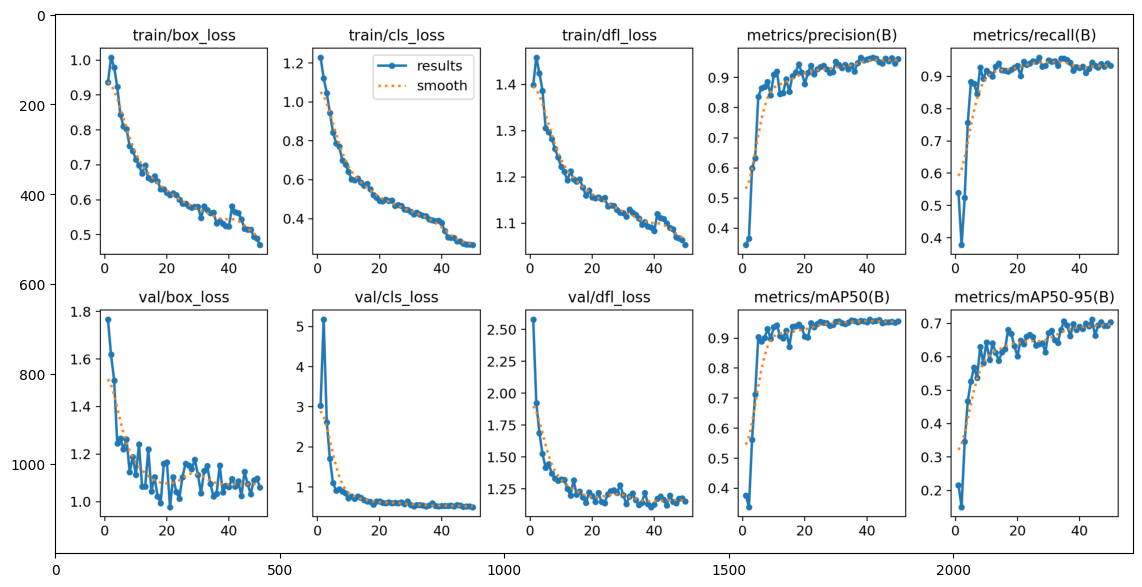

In [5]:
import matplotlib.pyplot as plt

from matplotlib import image
%matplotlib inline
metrics=image.imread('/content/runs/detect/train6/results.png')
plt.figure(figsize=(15,7))
plt.imshow(metrics)
plt.show()

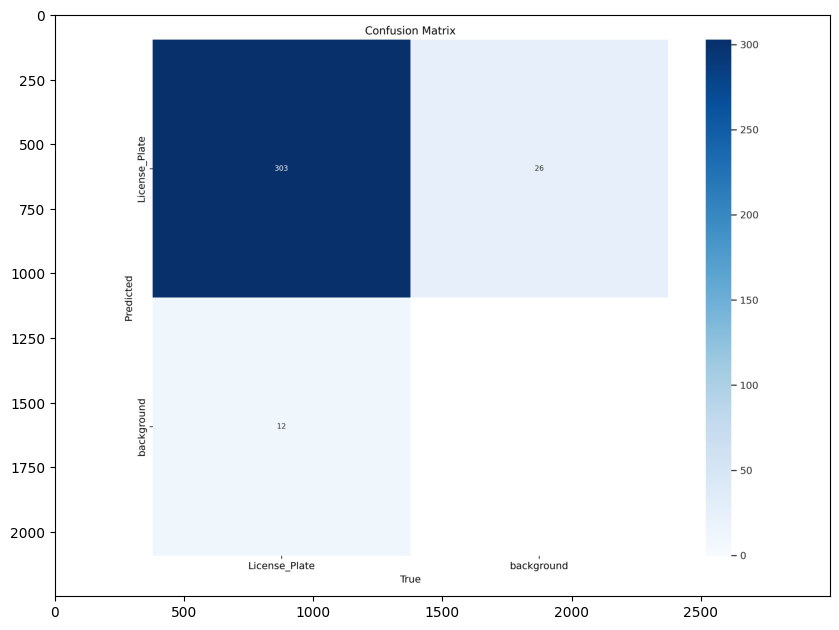

In [7]:
conf_matrix=image.imread('runs/detect/train6/confusion_matrix.png')
plt.figure(figsize=(10,10))
plt.imshow(conf_matrix)
plt.show()

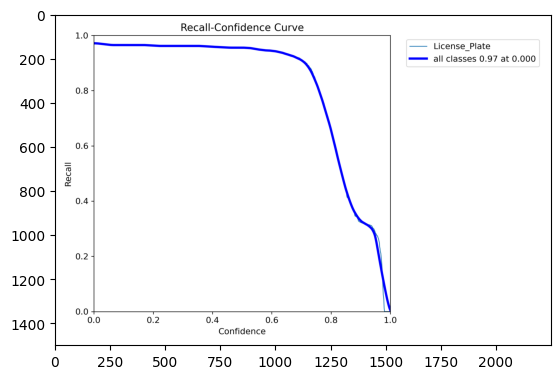

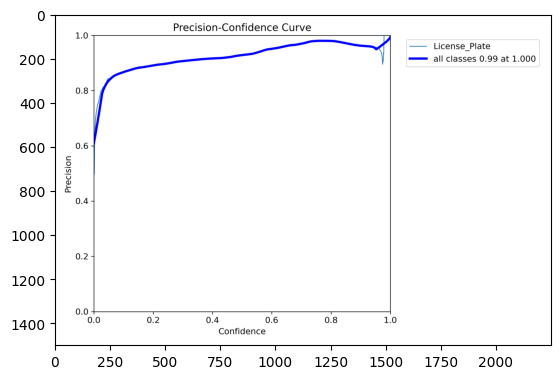

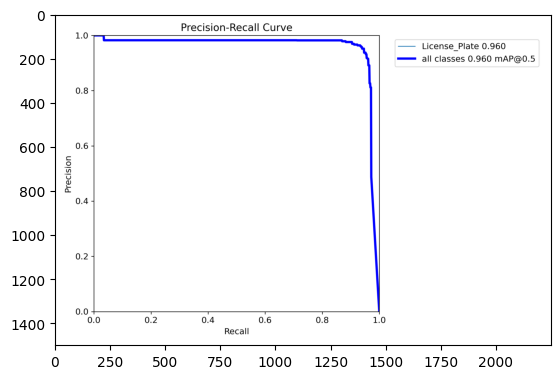

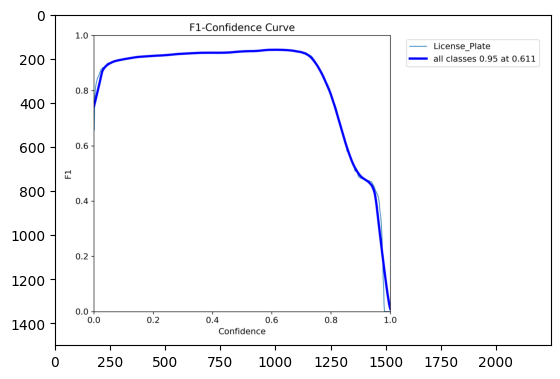

In [8]:
curves=['R_curve','P_curve','PR_curve','F1_curve']
for curve in curves:
    img=image.imread('runs/detect/train6/'+curve+'.png')
    plt.imshow(img)
    plt.show()

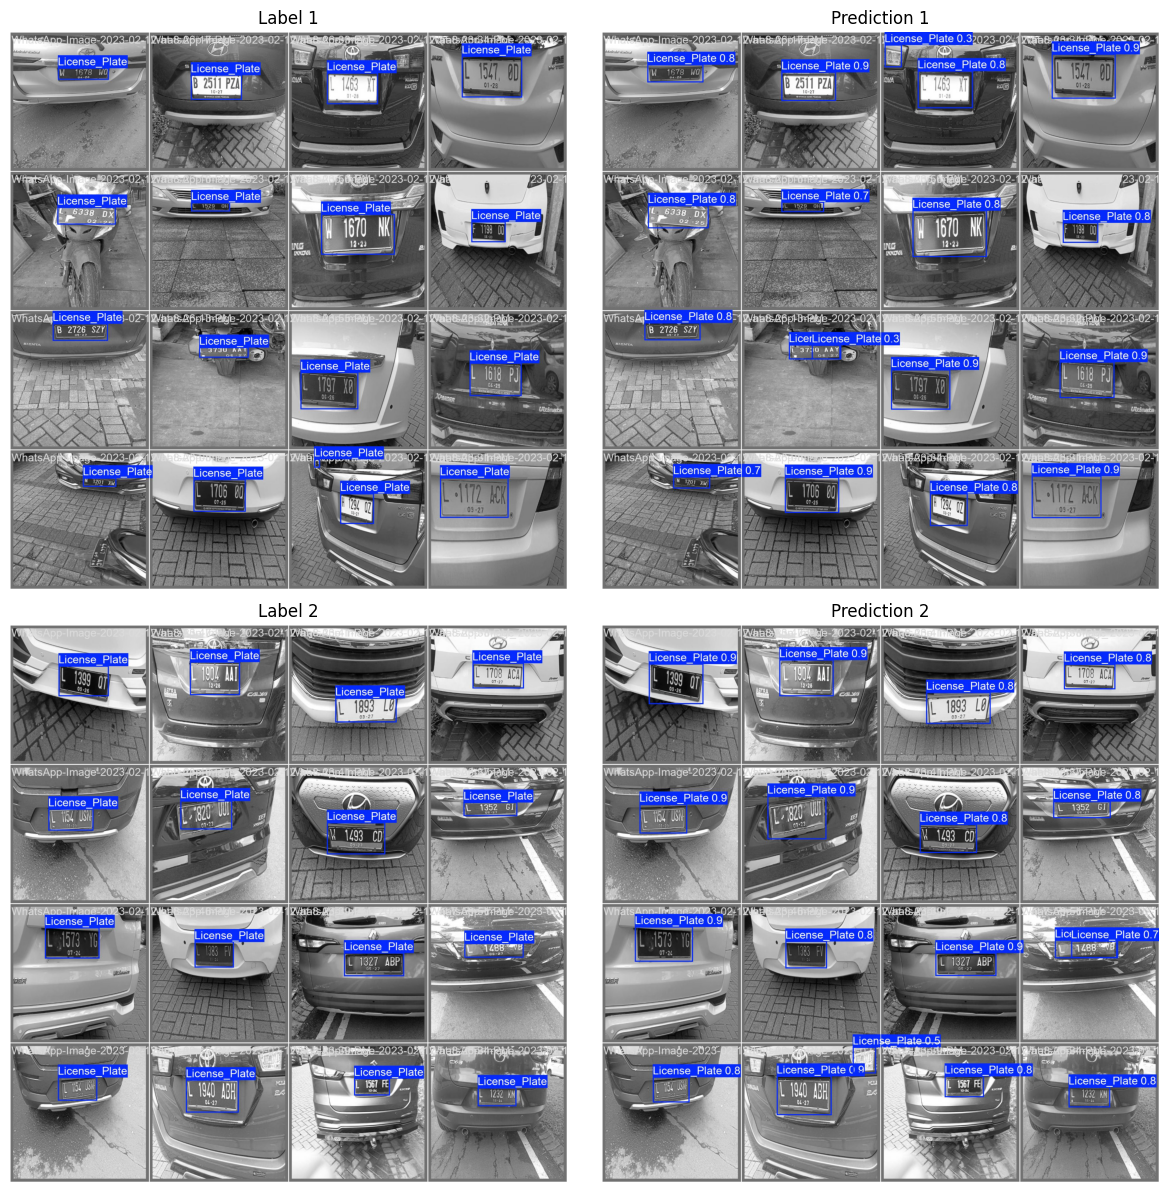

In [9]:
# Read images
label1 = plt.imread('runs/detect/train6/val_batch1_labels.jpg')
label2 = plt.imread('runs/detect/train6/val_batch2_labels.jpg')
pred1 = plt.imread('runs/detect/train6/val_batch1_pred.jpg')
pred2 = plt.imread('runs/detect/train6/val_batch2_pred.jpg')

# Create subplots with increased figure size
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

# Display images with titles and remove axis numbers
axarr[0, 0].imshow(label1)
axarr[0, 0].set_title('Label 1')
axarr[0, 0].axis('off')

axarr[0, 1].imshow(pred1)
axarr[0, 1].set_title('Prediction 1')
axarr[0, 1].axis('off')

axarr[1, 0].imshow(label2)
axarr[1, 0].set_title('Label 2')
axarr[1, 0].axis('off')

axarr[1, 1].imshow(pred2)
axarr[1, 1].set_title('Prediction 2')
axarr[1, 1].axis('off')

# Adjust layout with reduced padding
plt.tight_layout(pad=1)
plt.show()

# Test with images from internet


image 1/1 /content/1678275755219-IMG_20230308_183755_618.jpg: 480x640 1 License_Plate, 1010.5ms
Speed: 3.6ms preprocess, 1010.5ms inference, 16.2ms postprocess per image at shape (1, 3, 480, 640)


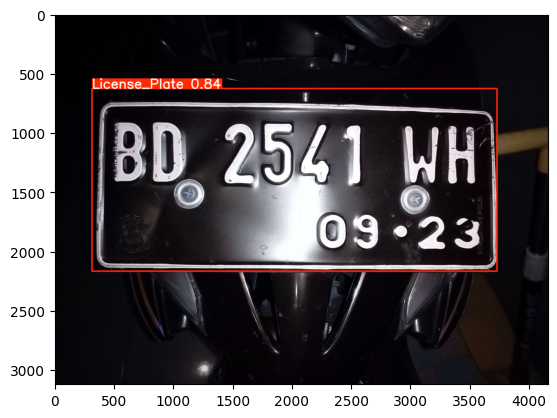

In [10]:
model = YOLO('/content/runs/detect/train6/weights/best.pt')

results = model("1678275755219-IMG_20230308_183755_618.jpg")

# show the image result with matplotlib with bounding box
plt.imshow(results[0].plot())
plt.show()
